In [1]:
# Import the functions used in this project
import awesome_functions as af

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle as pkl
slack_url = pkl.load(open("Slack_url/send_url.pickle", "rb"))

import xgboost

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [7]:
df_fl_sc = df_train.groupby(["FinelineNumber"]).sum()["ScanCount"].reset_index().sort_values("ScanCount", ascending =False)
df_fl_sc.head()

,FinelineNumber,ScanCount
3368,5501.0,8584
1089,1508.0,5894
653,808.0,4929
130,135.0,4798
2035,3120.0,4011


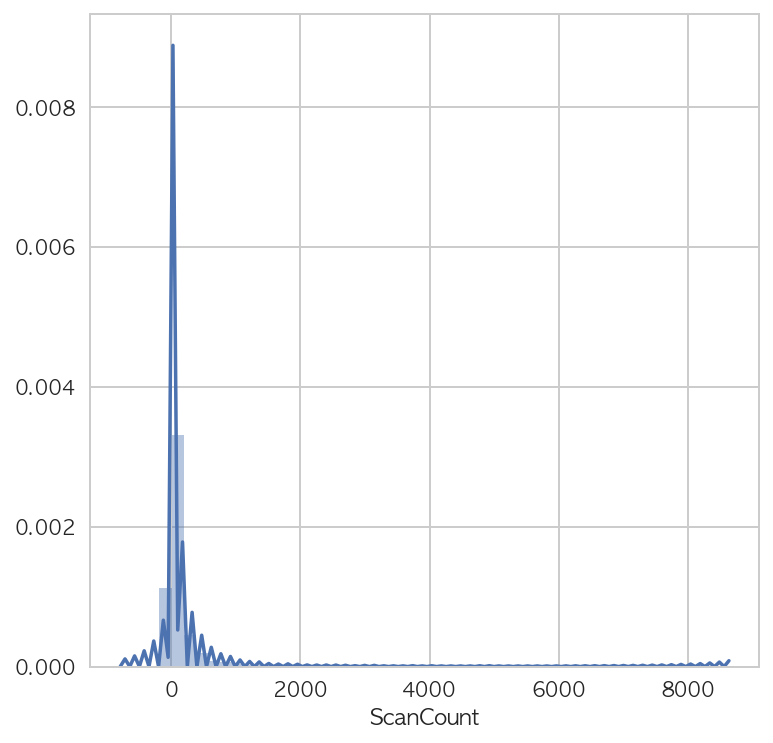

In [8]:
plt.figure(figsize=(6, 6))
sns.distplot(df_fl_sc["ScanCount"])
plt.show()

In [9]:
df_fl_sc.describe()

,FinelineNumber,ScanCount
count,5195.000000,5195.000000
mean,4291.170741,137.396920
std,2783.543953,337.974189
min,0.000000,-738.000000
25%,1899.500000,10.000000
50%,4058.000000,35.000000
75%,6531.500000,124.000000
max,9998.000000,8584.000000


In [10]:
bottom = 10
top = 124

In [11]:
df_fineline_50 = df_fl_sc[(df_fl_sc["ScanCount"]>=bottom)&(df_fl_sc["ScanCount"]<=top)]
df_fineline_50.head()

,FinelineNumber,ScanCount
1892,2908.0,124
2955,4659.0,124
3402,5547.0,124
3448,5624.0,124
2012,3091.0,124


In [12]:
cols = df_fineline_50["FinelineNumber"].unique()

In [13]:
cols

array([2908., 4659., 5547., ..., 3882., 5123., 6349.])